In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import date

In [2]:
!pip install statsmodels

                                              0.0/9.9 MB ? eta -:--:--
                                              0.1/9.9 MB 3.6 MB/s eta 0:00:03
     -                                        0.3/9.9 MB 4.1 MB/s eta 0:00:03
     -                                        0.5/9.9 MB 3.5 MB/s eta 0:00:03
     --                                       0.6/9.9 MB 3.6 MB/s eta 0:00:03
     --                                       0.7/9.9 MB 3.3 MB/s eta 0:00:03
     ---                                      0.9/9.9 MB 3.3 MB/s eta 0:00:03
     ----                                     1.1/9.9 MB 3.5 MB/s eta 0:00:03
     -----                                    1.3/9.9 MB 3.5 MB/s eta 0:00:03
     -----                                    1.4/9.9 MB 3.5 MB/s eta 0:00:03
     ------                                   1.5/9.9 MB 3.4 MB/s eta 0:00:03
     -------                                  1.7/9.9 MB 3.4 MB/s eta 0:00:03
     -------                                  1.9/9.9 MB 3.5 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
df = pd.read_csv("E:\\Shirin Gangal\\Python\\Python_learning\\Udemy ML\\Nat_Gas.csv")
df['Dates'] = pd.to_datetime(df['Dates'])


C:\Users\Welcome\AppData\Local\Temp\ipykernel_112\1035403533.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [6]:
df.head()


,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


In [9]:
df.set_index('Dates', inplace=True)
df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


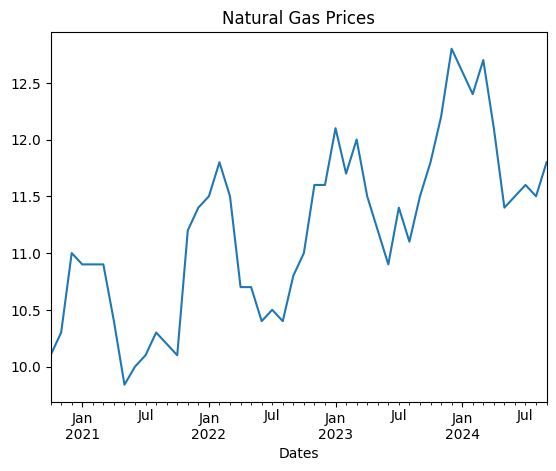

In [11]:
df = df.asfreq('M')  # Daily frequency; use 'M' for monthly if applicable
df['Prices'] = df['Prices'].interpolate()  # Fill missing data

# Plot to see trend/seasonality
df['Prices'].plot(title="Natural Gas Prices")
plt.show()

In [12]:
model = SARIMAX(df['Prices'],
                order=(1,1,1),          # ARIMA(p,d,q)
                seasonal_order=(1,1,1,12),  # SARIMA(P,D,Q,s) for monthly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)
print(results.summary())

C:\Users\Welcome\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             Prices   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   1.581
Date:                            Wed, 04 Jun 2025   AIC                              6.838
Time:                                    11:43:53   BIC                             12.061
Sample:                                10-31-2020   HQIC                             7.972
                                     - 09-30-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4532      0.301     -1.505      0.132      -1.044       0.137
ma.L1         -0.5152      0.344   

In [65]:
future_dates = pd.date_range(start=df.index[-1],end='2027-09-30', periods=365)
forecast = results.get_forecast(steps=366)


In [64]:
df.index[-1]

Timestamp('2024-09-30 00:00:00')

In [66]:
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [67]:
print(forecast_mean)

2024-10-31    12.125719
2024-11-30    12.588707
2024-12-31    12.934796
2025-01-31    13.039955
2025-02-28    12.761518
                ...    
2054-11-30    26.454960
2054-12-31    26.876404
2055-01-31    26.890766
2055-02-28    26.635639
2055-03-31    26.929193
Freq: M, Name: predicted_mean, Length: 366, dtype: float64


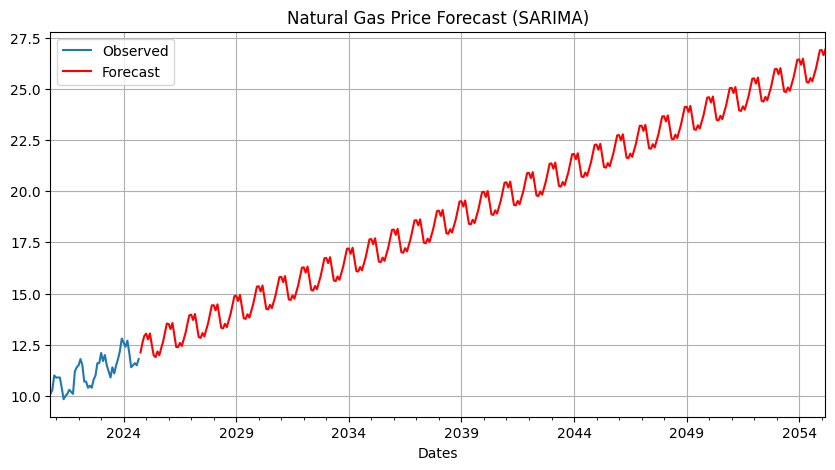

In [60]:
plt.figure(figsize=(10,5))
df['Prices'].plot(label='Observed')
forecast_mean.plot(label='Forecast', color='red')
#plt.fill_between(forecast_ci.index,
#                 forecast_ci.iloc[:, 0],
#                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Natural Gas Price Forecast (SARIMA)')
plt.legend()
plt.grid()
plt.show()


In [48]:
def sarima_predict(target_date):
    days_ahead = (target_date - df.index[-1].date()).days
    if days_ahead <= 0:
        return df.loc[str(target_date)]['Prices']
    else:
        return forecast_mean.iloc[days_ahead]

In [49]:
df.index[0].date()
days_ahead = (date(2025,2,1)- df.index[-1].date()).days
print(days_ahead)

124


In [52]:
inj_date = date(2025, 2, 1)
inj_price = sarima_predict(inj_date)

print(f"Predicted injection price on {inj_date}: ${inj_price:.2f}")


Predicted injection price on 2025-02-01: $17.41
